# Домашнее задание №3

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Генерируем сигнал

In [2]:
t = np.arange(0, 20, 0.001)
signalClean = 1.5 * np.cos(2.5 * t) + 2.5 * np.sin(0.5 * t) + 1.1 * np.sin(np.exp(-t))
signalNoise = signalClean + np.random.uniform(np.min(signalClean) / 3, 
                                              np.max(signalClean) / 3, len(t))

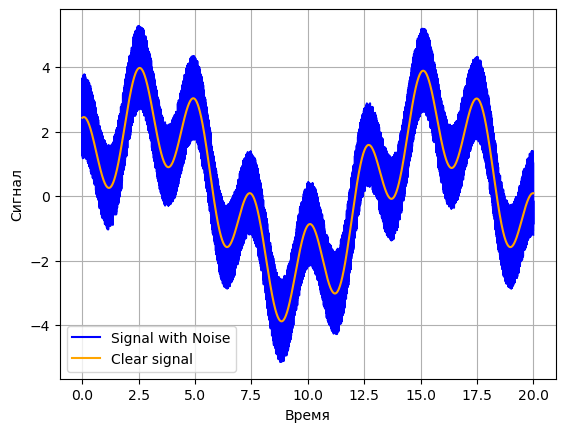

In [3]:
plt.plot(t, signalNoise, color="blue", label="Signal with Noise")
plt.plot(t, signalClean, color="orange", label="Clear signal")
plt.xlabel("Время")
plt.ylabel("Сигнал")
plt.grid(True)
plt.legend()
plt.show()

## Используем LMS для нахождения весов w

In [4]:
windowSize = 200
signalToProcess = [1] * (windowSize // 2) + list(signalClean) + [1] * (windowSize // 2)

In [5]:
test = np.convolve(signalNoise, [1]*windowSize, mode="same")
test

array([249.62842975, 253.28601041, 256.11691595, ...,   7.60751032,
         8.12696284,   7.88745643])

In [6]:
signalMatrix = list()
for i in range(len(signalToProcess)-200):
    signalMatrix.append(signalToProcess[i:i+200])
signalMatrix = np.array(signalMatrix)

In [7]:
coefs = np.linalg.lstsq(signalMatrix, signalClean)

C:\Users\Ivan\AppData\Local\Temp\ipykernel_10516\2688371147.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coefs = np.linalg.lstsq(signalMatrix, signalClean)


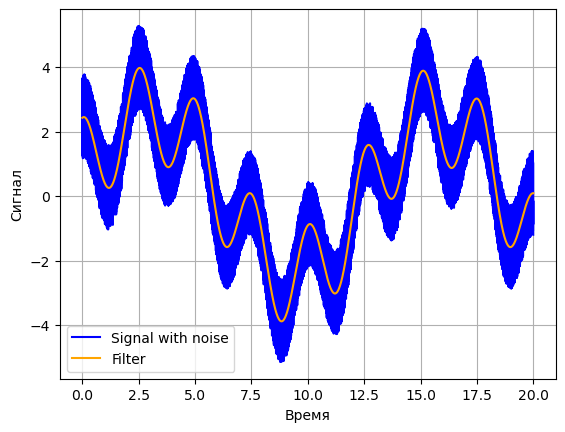

In [8]:
signalFiltered = signalMatrix @ coefs[0]
plt.plot(t, signalNoise, color="blue", label = "Signal with noise")
plt.plot(t, signalFiltered, color="orange", label = "Filter")
plt.xlabel("Время")
plt.ylabel("Сигнал")
plt.grid(True)
plt.legend()
plt.show()

## Адаптивный фильтр

In [9]:
def adaptiveFilter(signal, windowSize=10, alpha=0.01):

    signalSize = len(signal)
    w = np.ones(windowSize)

    for i in range(windowSize, signalSize):
        signalCut = signal[i-windowSize:i]
        err = signal[i] - np.dot(w, signalCut)
        w = w + alpha*np.dot(err, signalCut)
    
    return np.convolve(signal, w, mode="same")

In [10]:
bestAlpha = None
bestErr = None
for i in np.arange(1, 1e5+1, 100):
    alphaInput = 1 / i
    sum(signalClean - adaptiveFilter(signalClean, windowSize=200, alpha=alphaInput))
    if bestErr == None or err < bestErr:
        bestAlpha = alphaInput

C:\Users\Ivan\AppData\Local\Temp\ipykernel_10516\3017092913.py:9: RuntimeWarning: invalid value encountered in add
  w = w + alpha*np.dot(err, signalCut)


In [11]:
bestAlpha

1.0009909810712605e-05

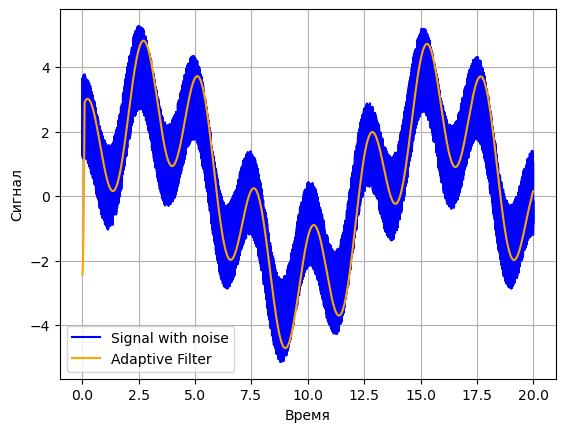

In [13]:
signalFiltered = adaptiveFilter(signalClean, windowSize=200, alpha=bestAlpha)
plt.plot(t, signalNoise, color="blue", label = "Signal with noise")
plt.plot(t, signalFiltered, color="orange", label = "Adaptive Filter")
plt.xlabel("Время")
plt.ylabel("Сигнал")
plt.grid(True)
plt.legend()
plt.show()